## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = mouse_data_combined["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_combined[mouse_data_combined.duplicated(subset=['Mouse ID','Timepoint'])]["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_combined.loc[mouse_data_combined["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_combined[mouse_data_combined["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_data_clean["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

mean_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
med_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
var_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
std_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
sem_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()
summary_stats = pd.DataFrame([mean_mouse_data, med_mouse_data, var_mouse_data, std_mouse_data, sem_mouse_data])
summary_statistics = summary_stats.T
summary_statistics.columns = ["Mean of Tumour Volume (mm3)", "Median of Tumour Volume (mm3)", "Variance of Tumour Volume (mm3)", "Standard Deviation of Tumour Volume (mm3)", "SEM of Tumour Volume (mm3)"]
summary_statistics


,Mean of Tumour Volume (mm3),Median of Tumour Volume (mm3),Variance of Tumour Volume (mm3),Standard Deviation of Tumour Volume (mm3),SEM of Tumour Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

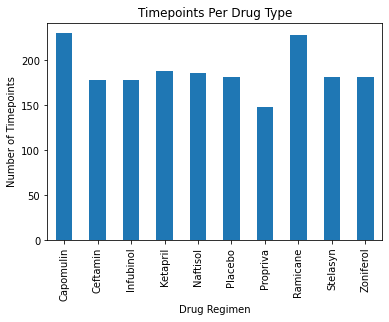

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug = mouse_data_clean.groupby("Drug Regimen")
count_chart = drug["Drug Regimen"].count()
count_chart.plot(kind="bar")
plt.title("Timepoints Per Drug Type")
plt.ylabel("Number of Timepoints")
plt.show()


In [11]:
drug_list = mouse_data_clean["Drug Regimen"].unique()
drug_list.sort()
y_axis = mouse_data_clean.groupby("Drug Regimen")["Timepoint"].count()


In [12]:
list = []
for entry in y_axis:
    print(entry)
    list.append(entry)
x_axis = np.arange(len(list))

230
178
178
188
186
181
148
228
181
182


Text(0, 0.5, 'Number of Timepoints')

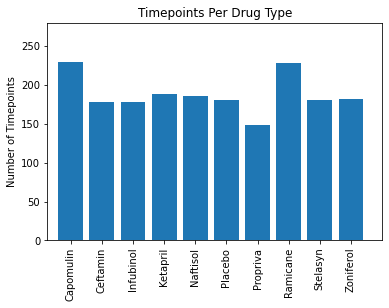

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.xticks(tick_locations, drug_list)
plt.ylim(0, max(y_axis)+50)
plt.bar(x_axis, list, align="center")
plt.xlim(-0.75, len(x_axis))
plt.title("Timepoints Per Drug Type")
plt.ylabel("Number of Timepoints")


Text(0.5, 1.0, 'Gender Distribution in Study')

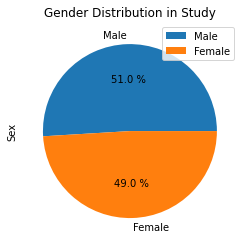

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_data_clean["Sex"].value_counts()
gender_count.plot(kind="pie", autopct='%.1f %%', legend=True)
plt.title("Gender Distribution in Study")


Text(0.5, 1.0, 'Gender Distribution in Study')

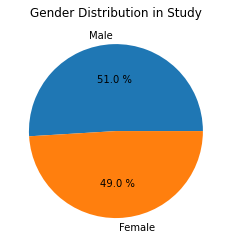

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_data_clean["Sex"].unique()
sex_count = mouse_data_clean["Sex"].value_counts()
plt.pie(sex_count, labels=genders, autopct='%.1f %%')
plt.title("Gender Distribution in Study")

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#capomulin = mouse_data_clean.loc[(mouse_data_clean["Drug Regimen"] == "Capomulin")]
#ramicane = mouse_data_clean.loc[(mouse_data_clean["Drug Regimen"] == "Ramicane")]
#infubinol = mouse_data_clean.loc[(mouse_data_clean["Drug Regimen"] == "Infubinol")]
#ceftamin = mouse_data_clean.loc[(mouse_data_clean["Drug Regimen"] == "Ceftamin")]
#best_four = pd.concat([capomulin, ramicane, infubinol, ceftamin])
#mouse_data_clean["Timepoint"].value_counts()



# Start by getting the last (greatest) timepoint for each mouse
last_df = mouse_data_clean.groupby(['Mouse ID'], as_index=False).last()
last_df = last_df.rename(columns={"Tumour Volume (mm3)": "Final Tumour Volume (mm3)"})
#last_df.columns

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
final_timepoint_df = pd.merge(mouse_data_clean, last_df, how="left", on=["Mouse ID", "Mouse ID"])
final_timepoint_df.head()

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumour Volume (mm3),Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Final Tumour Volume (mm3),Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1


In [94]:
capomulin = unique_mouse.loc[(unique_mouse["Drug Regimen"] == "Capomulin")]
capomulin_data = capomulin["Final Tumour Volume (mm3)"]
capomulin_quartiles = capomulin_data.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(capomulin_iqr)
print(capomulin_lower_bound)
print(capomulin_upper_bound)
capomulin

7.781863460000004
20.70456164999999
51.83201549


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumour Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2
80,i557,Capomulin,Female,1,24,45,47.685963,1
83,i738,Capomulin,Female,23,20,45,37.311846,2
85,j119,Capomulin,Female,7,23,45,38.125164,1
87,j246,Capomulin,Female,21,21,35,38.753265,1
108,l509,Capomulin,Male,17,21,45,41.483008,3


In [53]:
ramicane = unique_mouse.loc[(unique_mouse["Drug Regimen"] == "Ramicane")]
ramicane_data = ramicane["Final Tumour Volume (mm3)"]
ramicane_quartiles = ramicane_data.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(ramicane_iqr)
print(ramicane_lower_bound)
print(ramicane_upper_bound)

9.098536719999998
17.912664470000003
54.30681135


In [54]:
infubinol = unique_mouse.loc[(unique_mouse["Drug Regimen"] == "Infubinol")]
infubinol_data = infubinol["Final Tumour Volume (mm3)"]
infubinol_quartiles = infubinol_data.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(infubinol_iqr)
print(infubinol_lower_bound)
print(infubinol_upper_bound)

11.477135160000003
36.83290494999999
82.74144559000001


In [55]:
ceftamin = unique_mouse.loc[(unique_mouse["Drug Regimen"] == "Ceftamin")]
ceftamin_data = ceftamin["Final Tumour Volume (mm3)"]
ceftamin_quartiles = ceftamin_data.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(ceftamin_iqr)
print(ceftamin_lower_bound)
print(ceftamin_upper_bound)

15.577752179999997
25.355449580000002
87.66645829999999


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
final_drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)

#tumour_vol_data = unique_mouse["Final Tumour Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

infubinol_outlier = infubinol.loc[(infubinol["Final Tumour Volume (mm3)"] <= infubinol_lower_bound)]
infubinol_outlier    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumour Volume (mm3),Metastatic Sites
31,c326,Infubinol,Female,18,25,5,36.321346,0


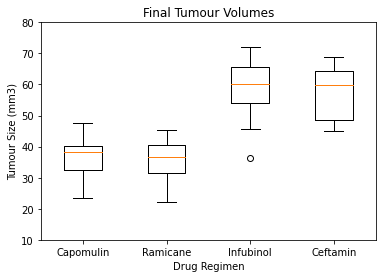

In [73]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(final_drug_list)
ax.set_ylabel("Tumour Size (mm3)")
ax.set_xlabel("Drug Regimen")
ax.set_title("Final Tumour Volumes")
ax.set_ylim(10,80)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumour Volume (mm3)')

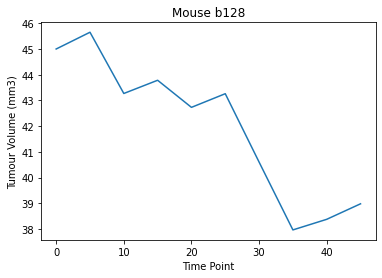

In [92]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = mouse_data_clean.loc[mouse_data_clean["Mouse ID"] == "b128"]
tumour_volume =  capomulin_mouse["Tumour Volume (mm3)"]
time_point = capomulin_mouse["Timepoint"]
plt.plot(time_point, tumour_volume)
plt.title("Mouse b128")
plt.xlabel("Time Point")
plt.ylabel("Tumour Volume (mm3)")

In [98]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_mice = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] == "Capomulin"]
result = [y.mean for x, y in zip(capomulin_mice['Mouse ID'], capomulin_mice['Tumour Volume (mm3)'])]
#tumour_volume_capomulin = capomulin_mice["Tumour Volume (mm3)"]
#mouse_weight_capomulin = capomulin_mice["Weight (g)"]
#plt.scatter(tumour_volume_capomulin, mouse_weight_capomulin)
plt.scatter(capomulin_mice['Tumour Volume (mm3)'], capomulin_mice['Weight (g)'])


AttributeError: 'float' object has no attribute 'mean'

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
